In [35]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
data = pd.read_csv('E:/BTC-USD.csv')
df = data
X = []
Y = []
window_size=100
for i in range(1, len(df) - window_size - 1, 1):
    first = df.iloc[i, 4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 4] - first) / first)
    temp2.append((df.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)

train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],100,1)
test_X = test_X.reshape(test_X.shape[0],100,1)

In [38]:
model = tf.keras.Sequential()

In [39]:
# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

In [40]:
# Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [41]:
history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=100, batch_size=128, verbose=1, shuffle=True)
history_dict = history.history
train_loss = history_dict['loss']
train_msle = history_dict['mse']

model.evaluate(test_X, test_Y)

Epoch 1/100
7/7 [==============================] - 41s 703ms/step - loss: 0.4249 - mse: 0.4249 - mae: 0.4284 - val_loss: 0.1807 - val_mse: 0.1807 - val_mae: 0.3167
Epoch 2/100
7/7 [==============================] - 1s 96ms/step - loss: 0.1539 - mse: 0.1539 - mae: 0.2959 - val_loss: 0.0750 - val_mse: 0.0750 - val_mae: 0.1965
Epoch 3/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0935 - mse: 0.0935 - mae: 0.2132 - val_loss: 0.0583 - val_mse: 0.0583 - val_mae: 0.1951
Epoch 4/100
7/7 [==============================] - 1s 88ms/step - loss: 0.0754 - mse: 0.0754 - mae: 0.2006 - val_loss: 0.0416 - val_mse: 0.0416 - val_mae: 0.1549
Epoch 5/100
7/7 [==============================] - 1s 95ms/step - loss: 0.0607 - mse: 0.0607 - mae: 0.1708 - val_loss: 0.0560 - val_mse: 0.0560 - val_mae: 0.1756
Epoch 6/100
7/7 [==============================] - 1s 89ms/step - loss: 0.0567 - mse: 0.0567 - mae: 0.1702 - val_loss: 0.0367 - val_mse: 0.0367 - val_mae: 0.1433
Epoch 7/100
7/7 [=========

4/4 [==============================] - 0s 11ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0713


[0.00998646765947342, 0.00998646765947342, 0.0712503045797348]

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

# Calculate MAE, RMSE, and R^2
mae = mean_absolute_error(test_Y.reshape(-1, 1), yhat_probs)
print('Mean Absolute Error (MAE): %f' % mae)

rmse = np.sqrt(mean_squared_error(test_Y.reshape(-1, 1), yhat_probs))
print('Root Mean Squared Error (RMSE): %f' % rmse)

r2 = r2_score(test_Y.reshape(-1, 1), yhat_probs)
print('R2 Score: %f' % r2)

Mean Absolute Error (MAE): 0.071250
Root Mean Squared Error (RMSE): 0.099932
R2 Score: 0.981383


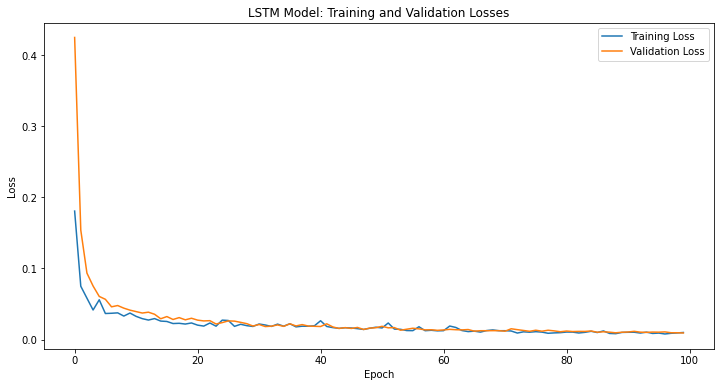

In [43]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Training Loss')
plt.plot(history.history['loss'], label='Validation Loss')
plt.title('LSTM Model: Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
# Predict the values using the trained model
predictions = model.predict(test_X)

# Reverse the normalization process
def denormalize(value, first_value):
    return value * first_value + first_value

denormalized_predictions = np.empty_like(predictions)
denormalized_test_Y = np.empty_like(test_Y)

# Apply denormalization
for i in range(len(predictions)):
    first_value = df.iloc[i + window_size, 4]
    denormalized_predictions[i] = denormalize(predictions[i], first_value)
    denormalized_test_Y[i] = denormalize(test_Y[i], first_value)
    
# Compare denormalized predictions with actual values
for i in range(len(denormalized_predictions)):
    print(f"Prediction: {denormalized_predictions[i][0].item():.2f} | Actual: {denormalized_test_Y[i][0].item():.2f}")

4/4 [==============================] - 0s 48ms/step
Prediction: 6073.65 | Actual: 6216.39
Prediction: 8624.39 | Actual: 9022.39
Prediction: 14136.34 | Actual: 13351.63
Prediction: 4350.37 | Actual: 3955.88
Prediction: 6203.08 | Actual: 6246.75
Prediction: 4574.05 | Actual: 5461.51
Prediction: 5635.26 | Actual: 4781.01
Prediction: 6521.23 | Actual: 6512.47
Prediction: 8381.24 | Actual: 8241.37
Prediction: 7902.69 | Actual: 7436.44
Prediction: 5585.50 | Actual: 4885.86
Prediction: 4018.09 | Actual: 4403.39
Prediction: 5348.27 | Actual: 5235.27
Prediction: 12870.42 | Actual: 11992.22
Prediction: 14192.66 | Actual: 13207.81
Prediction: 11327.41 | Actual: 11667.78
Prediction: 5498.88 | Actual: 5212.08
Prediction: 9602.03 | Actual: 9162.26
Prediction: 8111.91 | Actual: 8768.54
Prediction: 23746.58 | Actual: 24962.08
Prediction: 5445.98 | Actual: 5977.35
Prediction: 25721.19 | Actual: 23072.96
Prediction: 8236.33 | Actual: 7140.54
Prediction: 19786.93 | Actual: 16704.44
Prediction: 22078.77 |

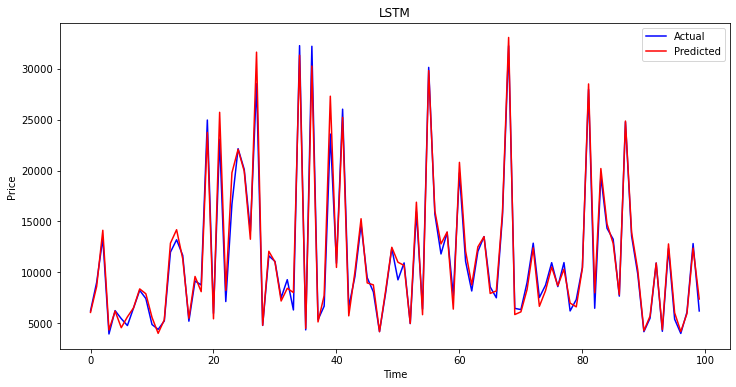

<Figure size 432x288 with 0 Axes>

In [45]:
# Flatten the denormalized_test_Y and denormalized_predictions arrays
denormalized_test_Y_flattened = denormalized_test_Y.flatten()
denormalized_predictions_flattened = denormalized_predictions.flatten()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(denormalized_test_Y_flattened, label='Actual', color='blue')
plt.plot(denormalized_predictions_flattened, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('LSTM')
plt.show()
# Save the plot as an image file
plt.savefig('LSTM: actual_vs_predicted.png', dpi=300, bbox_inches='tight')